In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [2]:
np.random.seed(42)

In [3]:
#This is a really easy case
X, y= sklearn.datasets.make_blobs(n_samples=30, cluster_std=.3, centers=[(2,2),(4,2)])

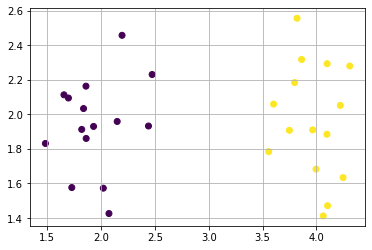

In [4]:
plt.grid()
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
class Node():
    def __init__(self, parent, data_pt_i, data_pt, radius, n_elements, data_i=None, data=None):
        self.parent=parent
        self.right=None
        self.left=None
        #payload
        self.data_pt_i = data_pt_i #the point index into the data
        self.data_pt = data_pt #the actual point
        self.radius = radius#the radius of points nearby
        self.n_elements = n_elements#including this point
        self.data = data #these fields are used for leaf nodes
        self.data_i = data_i 

In [22]:
class Ball_Tree():
    def __init__(self, X, min_pts):
        self.X = X
        self.min_pts = min_pts
        centroid = self.X.mean(axis=0)
        center_pt_i = distance.cdist(centroid.reshape(1,-1), self.X).argmin()
        radius = distance.cdist(X[center_pt_i].reshape(1,-1), self.X).min()
        self.root = self.create_node(None, center_pt_i, radius, np.arange(X.shape[0]))
        
    def find_new_nodes(self, data_subset_i):
        centroid = self.X[data_subset_i].mean(axis=0)
        node1_i = data_subset_i[distance.cdist(centroid.reshape(1,-1), self.X[data_subset_i]).argmax()]
        node2_i = data_subset_i[distance.cdist(self.X[node1_i].reshape(1,-1), self.X[data_subset_i]).argmax()]
        return node1_i, node2_i
    
    def split_data(self, node1_i, node2_i, data_subset_i):
        #first col node1, then node2
        distance_arr = distance.cdist(self.X[data_subset_i], self.X[[node1_i, node2_i]])
        cluster_assignments = distance_arr.argmin(axis=1)
        #gives 0 if closer to node_1, 1 if closer to node_2
        data1_local_i = np.nonzero(cluster_assignments == 0)
        data2_local_i = np.nonzero(cluster_assignments == 1)
        cl1 = data_subset_i[data1_local_i]
        cl2 = data_subset_i[data2_local_i]
        rad1 = distance_arr[data1_local_i,0].max()
        rad2 = distance_arr[data1_local_i,1].max()
        return cl1, cl2, rad1, rad2
    
    def create_node(self, parent_node, data_pt_i, radius, data_subset_i):
        if len(data_subset_i) <= self.min_pts:
            #Base Case
            return Node(parent_node, data_pt_i, self.X[data_pt_i],radius, data_subset_i.shape[0], 
                        data_subset_i, X[data_subset_i])
        else:
            #Create More Nodes
            data_pt1_i, data_pt2_i = self.find_new_nodes(data_subset_i)
            data_subset1_i, data_subset2_i, rad1, rad2 = self.split_data(data_pt1_i, data_pt2_i, data_subset_i)
            current_node = Node(parent_node,data_pt_i, self.X[data_pt_i], radius, len(data_subset_i))
            current_node.right = self.create_node(current_node, data_pt1_i, rad1, data_subset1_i)
            current_node.left = self.create_node(current_node, data_pt2_i, rad2, data_subset2_i)
            return current_node

In [23]:
tree = Ball_Tree(X, 1)

In [20]:
def plot_node(node, color):
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.scatter(node.data_pt[0], node.data_pt[1], c=color)
    plt.axis("equal")
    plt.grid()
    plt.show()

[2.43969463 1.93226711] [2.43969463 1.93226711] 30 0.0


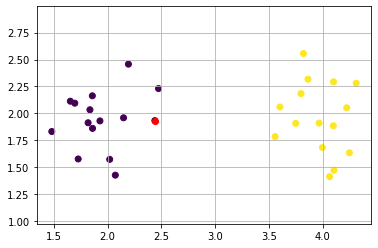

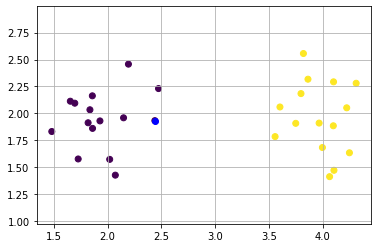

[4.30929986 2.27938404] [4.30929986 2.27938404] 15 2.8620665710143918


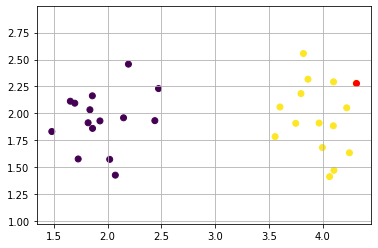

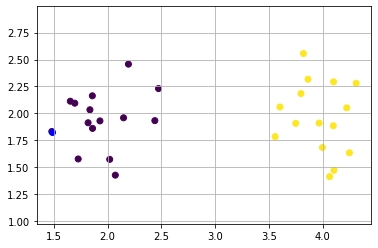

[4.06265908 1.41209896] [4.06265908 1.41209896] 8 1.1691525379528054


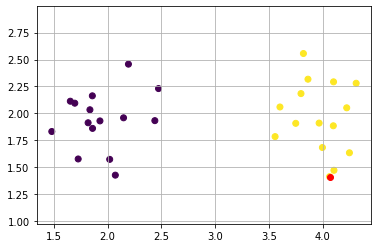

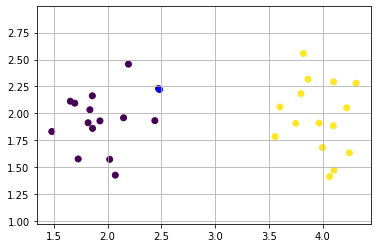

[4.24676347 1.63374691] [4.24676347 1.63374691] 6 0.70649263245238


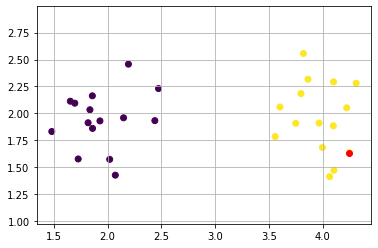

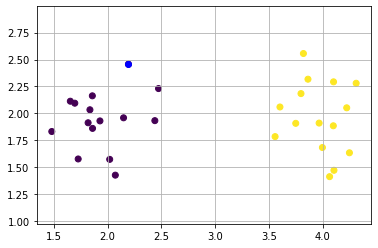

[4.06265908 1.41209896] [4.06265908 1.41209896] 3 0.5070044871654737


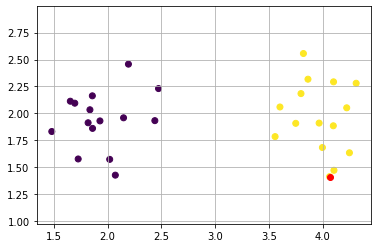

AttributeError: 'NoneType' object has no attribute 'data_pt'

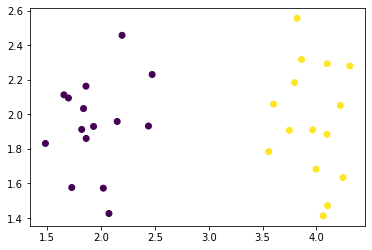

In [21]:

left = tree.root
right = tree.root
while left:
    print(left.data_pt, X[left.data_pt_i], left.n_elements, left.radius)
    plot_node(left, 'r')
    plot_node(right, 'b')
    left = left.left
    right = right.right